<a href="https://colab.research.google.com/github/eric-Rstats/practice-coding/blob/master/deep-learning/deeplearning_with_keras_version2/chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: classification and regression

## Classifying movie reviews: a binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


### Preparing the data

**Encoding the integer sequences via one-hot encoding**

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [20]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [22]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5609 - accuracy: 0.7543 - val_loss: 0.4043 - val_accuracy: 0.8637
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3097 - accuracy: 0.8978 - val_loss: 0.2947 - val_accuracy: 0.8877
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2101 - accuracy: 0.9270 - val_loss: 0.2797 - val_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1580 - accuracy: 0.9472 - val_loss: 0.2823 - val_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1261 - accuracy: 0.9589 - val_loss: 0.3378 - val_accuracy: 0.8774
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1045 - accuracy: 0.9656 - val_loss: 0.3597 - val_accuracy: 0.8711
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0784 - accuracy: 0.9771 - val_loss: 0.3536 - val_accuracy: 0.8792
Epoch 8/20
30

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

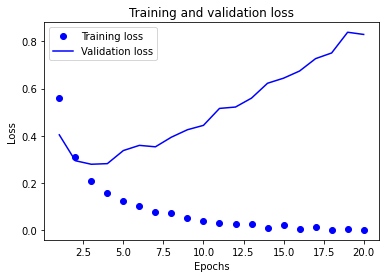

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

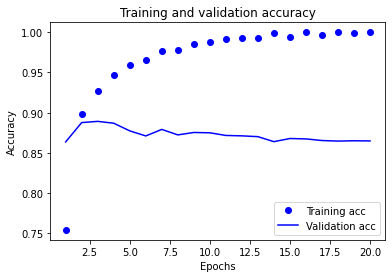

In [25]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [28]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 42ms/step - loss: 0.4540 - accuracy: 0.8159 - val_loss: 0.2945 - val_accuracy: 0.9039
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2589 - accuracy: 0.9103 - val_loss: 0.1924 - val_accuracy: 0.9394
Epoch 3/4
49/49 [==============================] - 2s 33ms/step - loss: 0.1979 - accuracy: 0.9300 - val_loss: 0.1524 - val_accuracy: 0.9541
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2947 - accuracy: 0.8842


In [17]:
results

[0.3023279309272766, 0.8812800049781799]

### Using a trained model to generate predictions on new data

In [18]:
model.predict(x_test)

array([[0.25052685],
       [0.99918234],
       [0.9385867 ],
       ...,
       [0.18725774],
       [0.09109899],
       [0.7733208 ]], dtype=float32)

In [31]:
del history

### Further experiments

### Wrapping up

## Classifying newswires: a multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
print(decoded_newswire)

557056/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [10]:
# 由于是多分类，所以类型变量也可以做下one-hot
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Building your model

**Model definition**

In [16]:
from tensorflow.keras import Sequential, layers
model = Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [17]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

**Training the model**

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 63ms/step - loss: 2.7110 - accuracy: 0.5247 - val_loss: 1.8134 - val_accuracy: 0.6180
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.4675 - accuracy: 0.7002 - val_loss: 1.3338 - val_accuracy: 0.7070
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0827 - accuracy: 0.7717 - val_loss: 1.1412 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8524 - accuracy: 0.8187 - val_loss: 1.0485 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6841 - accuracy: 0.8518 - val_loss: 0.9661 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5529 - accuracy: 0.8836 - val_loss: 0.9265 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4457 - accuracy: 0.9052 - val_loss: 0.9144 - val_accuracy: 0.8120
Epoch 8/20
16

**Plotting the training and validation loss**

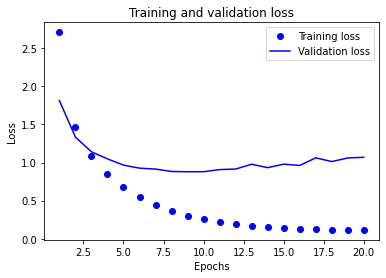

In [21]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

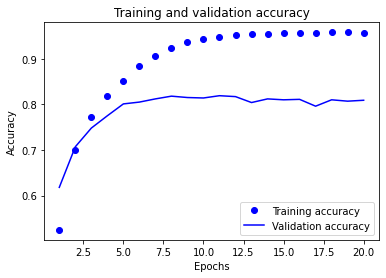

In [22]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [23]:
model = Sequential([
   layers.Dense(64, activation="relu"),
   layers.Dense(64, activation="relu"),
   layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 58ms/step - loss: 2.6250 - accuracy: 0.5174 - val_loss: 1.7288 - val_accuracy: 0.6340
Epoch 2/9
16/16 [==============================] - 1s 46ms/step - loss: 1.4057 - accuracy: 0.6999 - val_loss: 1.3162 - val_accuracy: 0.7070
Epoch 3/9
16/16 [==============================] - 1s 46ms/step - loss: 1.0438 - accuracy: 0.7754 - val_loss: 1.1415 - val_accuracy: 0.7530
Epoch 4/9
16/16 [==============================] - 1s 47ms/step - loss: 0.8126 - accuracy: 0.8307 - val_loss: 1.0586 - val_accuracy: 0.7750
Epoch 5/9
16/16 [==============================] - 1s 45ms/step - loss: 0.6497 - accuracy: 0.8672 - val_loss: 0.9754 - val_accuracy: 0.8000
Epoch 6/9
16/16 [==============================] - 1s 46ms/step - loss: 0.5096 - accuracy: 0.8948 - val_loss: 0.9251 - val_accuracy: 0.8010
Epoch 7/9
16/16 [==============================] - 1s 45ms/step - loss: 0.4113 - accuracy: 0.9119 - val_loss: 0.9123 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

In [24]:
results

[0.9782536625862122, 0.7885128855705261]

In [25]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19011576135351738

### Generating predictions on new data

In [26]:
predictions = model.predict(x_test)

In [27]:
predictions[0].shape

(46,)

In [28]:
np.sum(predictions[0])

0.9999998

In [29]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [30]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [31]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [36]:
model = Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 20ms/step - loss: 1.8029 - accuracy: 0.6307 - val_loss: 1.2861 - val_accuracy: 0.7310
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 0.9575 - accuracy: 0.7935 - val_loss: 1.0195 - val_accuracy: 0.7880
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 0.6382 - accuracy: 0.8641 - val_loss: 0.9009 - val_accuracy: 0.8080
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 0.4401 - accuracy: 0.9070 - val_loss: 0.8868 - val_accuracy: 0.8190
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 0.3178 - accuracy: 0.9296 - val_loss: 0.9436 - val_accuracy: 0.8110
Epoch 6/20
63/63 [==============================] - 1s 17ms/step - loss: 0.2468 - accuracy: 0.9435 - val_loss: 0.9042 - val_accuracy: 0.8140
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 0.2028 - accuracy: 0.9506 - val_loss: 1.0737 - val_accuracy: 0.7970
Epoch 8/20
63

### Further experiments

### Wrapping up

## Predicting house prices: a regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [37]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [38]:
train_data.shape

(404, 13)

In [39]:
test_data.shape

(102, 13)

In [40]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [41]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [43]:
# 最后一层不使用激活函数，则输出的是数值，成为回归模型
def build_model():
    model = Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [44]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [45]:
all_scores

[2.044875383377075, 2.5216143131256104, 2.662111282348633, 2.523393392562866]

In [46]:
np.mean(all_scores)

2.437998592853546

**Saving the validation logs at each fold**

In [47]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [48]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

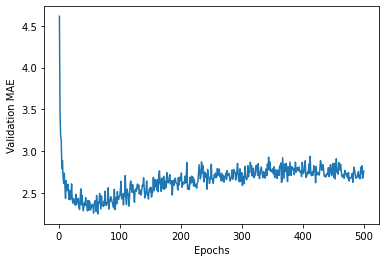

In [49]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting smoothed validation scores, excluding the first 10 data points**

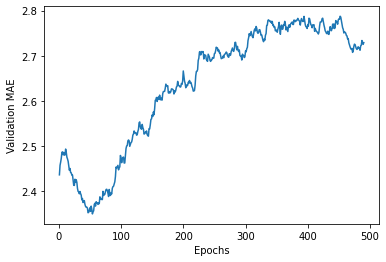

In [50]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### Wrapping up

## Chapter summary